In [5]:
import json, base64, glob
from IPython.display import display, Image, HTML, Markdown

In [ ]:
# ============================================================
# EDA Plot Descriptions
# ============================================================
descriptions = {
    "01_state_distribution": {
        "title": "1. Order State Distribution",
        "desc": """Shows the count of orders in each state (e.g. CLOSED, CANCELLED, etc.).
        This is essentially your **target variable overview** — helps you understand class balance.
        If one state dominates, you may need stratified sampling or class weighting in modeling."""
    },
    "02_top20_services": {
        "title": "2. Top 20 Services",
        "desc": """Horizontal bar chart of the 20 most frequently ordered services (e.g. cooler, grooming, locksmith).
        Reveals which services drive the most volume. Long-tail services with few orders
        may behave differently and could need special handling or grouping."""
    },
    "03_top15_categories": {
        "title": "3. Top 15 Categories",
        "desc": """Similar to services but at the **category level** (e.g. cleaning, renovation, repair).
        Shows the high-level business segments. Useful for feature engineering —
        you might group rare categories into 'other'."""
    },
    "04_payment_method": {
        "title": "4. Payment Method",
        "desc": """Pie chart showing CASH vs other payment methods.
        If one method overwhelmingly dominates, this feature may have low predictive power.
        Also reveals business insight about customer payment preferences."""
    },
    "05_gender": {
        "title": "5. Customer Gender",
        "desc": """Pie chart of MALE / FEMALE / missing gender.
        Shows demographic split of customers. Note the ~16K missing values.
        Gender imbalance may reflect the nature of home services."""
    },
    "06_device": {
        "title": "6. Device Distribution",
        "desc": """Bar chart of devices used to place orders (android, ios, web).
        Indicates the platform mix. Could correlate with customer demographics
        or behavior patterns (e.g. web users might be more deliberate)."""
    },
    "07_numeric_distributions": {
        "title": "7. Numeric Feature Distributions",
        "desc": """Grid of histograms for 10 key numeric features (clipped to 1st-99th percentile to remove outliers):
        - **Selected_Price**: order price — likely right-skewed
        - **Duration**: service duration in hours
        - **Customer_CharehPoints**: loyalty points
        - **Customer_PreviousOrdersCount**: repeat usage
        - **arranged_expert_rate**: expert rating
        - **arranged_expert_successful_jobs**: expert experience
        - **Time_to_First_Contract**: minutes until first expert responds
        - **Time_to_Service**: minutes from order creation to service start
        - **Customer_Account_Age**: how old the customer account is
        - **Customer_Order_Rate**: order frequency
        
        Look for: skewness (may need log transform), bimodal patterns, zero-inflation."""
    },
    "08_correlation_heatmap": {
        "title": "8. Full Correlation Heatmap",
        "desc": """Lower-triangle heatmap of Pearson correlations between ALL numeric features.
        Color scale: red = positive, blue = negative correlation.
        Use this to spot:
        - **Multicollinearity** (highly correlated feature pairs — redundant for models)
        - **Target-correlated features** (if State is encoded)
        - **Feature clusters** that move together"""
    },
    "09_top_correlations": {
        "title": "9. Top 30 Correlated Feature Pairs",
        "desc": """Zoomed-in view: the 30 strongest absolute correlations between feature pairs.
        Green = positive, Red = negative.
        Highly correlated pairs (|r| > 0.8) are candidates for dropping one of the two.
        E.g. expert contracts count vs done contracts count are likely near-duplicates."""
    },
    "10_orders_over_time": {
        "title": "10. Orders Over Time (Year & Season)",
        "desc": """Two plots side by side:
        - **Left**: order volume by year (2021-2023) — shows business growth/decline
        - **Right**: order volume by season — reveals seasonality
        
        Seasonality matters for time-based splits and for understanding demand cycles."""
    },
    "11_hourly_pattern": {
        "title": "11. Hourly Order Pattern",
        "desc": """Line chart of order creation count by hour of day (0-23).
        Shows when customers place orders — expect peaks in morning/evening.
        Useful for understanding customer behavior and could be a predictive feature."""
    },
    "12_day_of_week": {
        "title": "12. Day of Week Pattern",
        "desc": """Bar chart of orders by weekday (Mon-Sun).
        Shows weekly demand cycles. If weekends differ significantly from weekdays,
        this feature carries signal. Note: in Iran, the weekend is Thu-Fri."""
    },
    "13_allocation_counselling": {
        "title": "13. Allocation Type & Counselling Needed",
        "desc": """Two bar charts:
        - **Allocation Type**: AUTOMATIC vs MANUAL allocation of experts — 
          shows how orders are matched to service providers
        - **Counselling Needed**: whether the order required pre-service consultation (True/False)
        
        These are process-related features that may strongly predict outcomes."""
    },
    "14_price_by_state": {
        "title": "14. Price Distribution by Order State",
        "desc": """Boxplots of Selected_Price grouped by order State (clipped to 5th-95th percentile).
        Shows whether price differs across outcomes (CLOSED, CANCELLED, etc.).
        If cancelled orders have systematically different prices, price is predictive.
        Look for differences in medians and spread across states."""
    },
    "15_missing_values": {
        "title": "15. Missing Values Summary",
        "desc": """Horizontal bar chart showing columns with missing data and their percentage.
        Key for data cleaning decisions:
        - High missing (>20%): consider dropping or creating a 'missing' indicator
        - Low missing (<5%): impute with median/mode
        - Pattern matters: if missingness correlates with the target, it's informative (MNAR)"""
    },
}

Found 15 plot files



Shows the count of orders in each state (e.g. CLOSED, CANCELLED, etc.).
        This is essentially your **target variable overview** — helps you understand class balance.
        If one state dominates, you may need stratified sampling or class weighting in modeling.

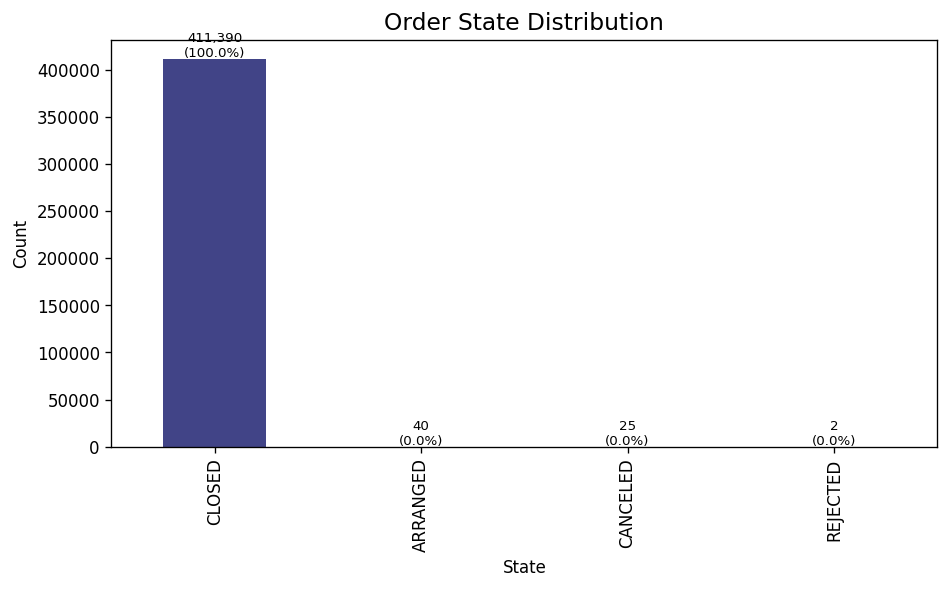

Horizontal bar chart of the 20 most frequently ordered services (e.g. cooler, grooming, locksmith).
        Reveals which services drive the most volume. Long-tail services with few orders
        may behave differently and could need special handling or grouping.

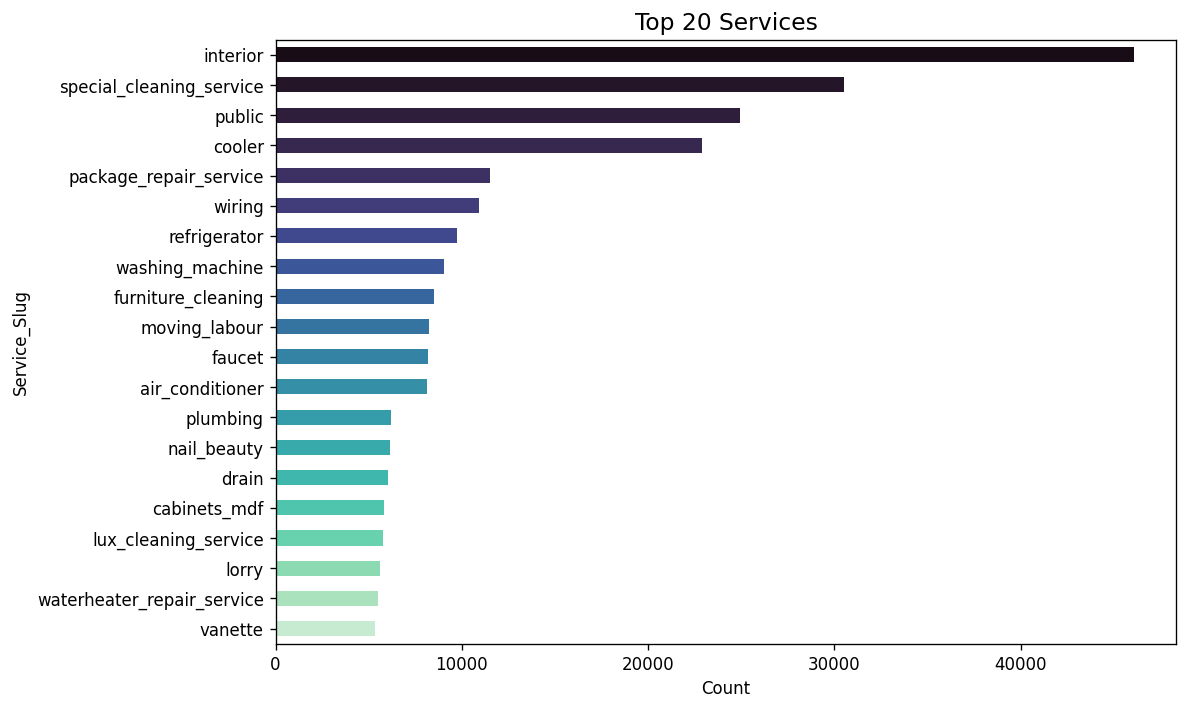

Similar to services but at the **category level** (e.g. cleaning, renovation, repair).
        Shows the high-level business segments. Useful for feature engineering —
        you might group rare categories into 'other'.

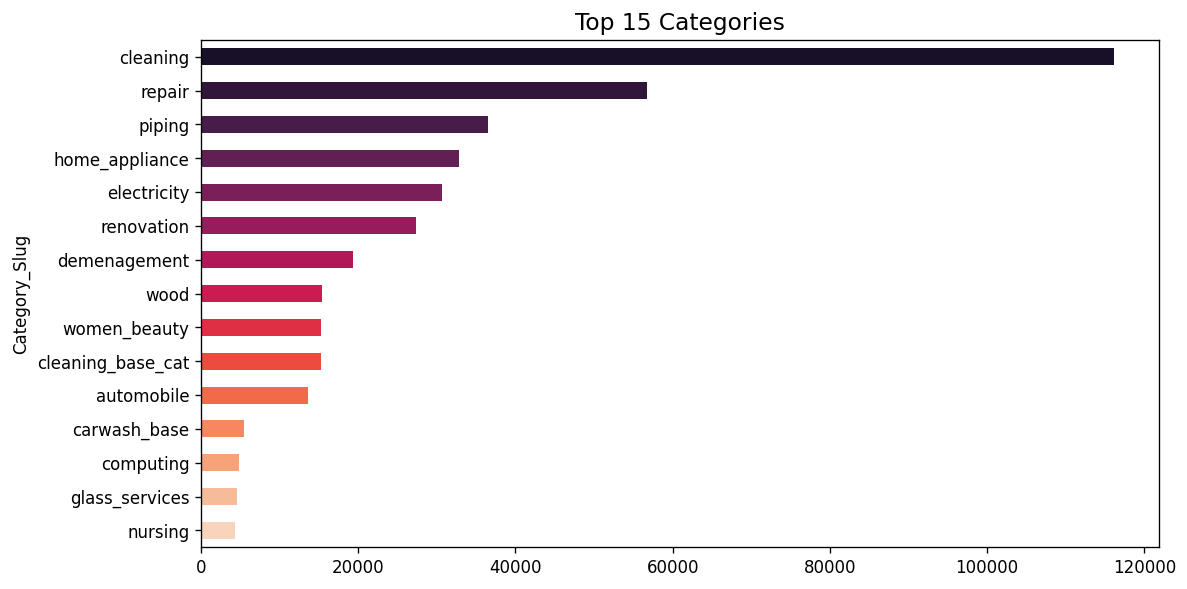

Pie chart showing CASH vs other payment methods.
        If one method overwhelmingly dominates, this feature may have low predictive power.
        Also reveals business insight about customer payment preferences.

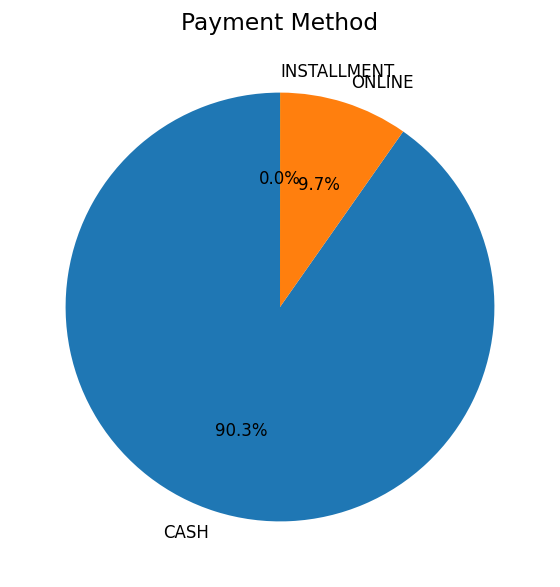

Pie chart of MALE / FEMALE / missing gender.
        Shows demographic split of customers. Note the ~16K missing values.
        Gender imbalance may reflect the nature of home services.

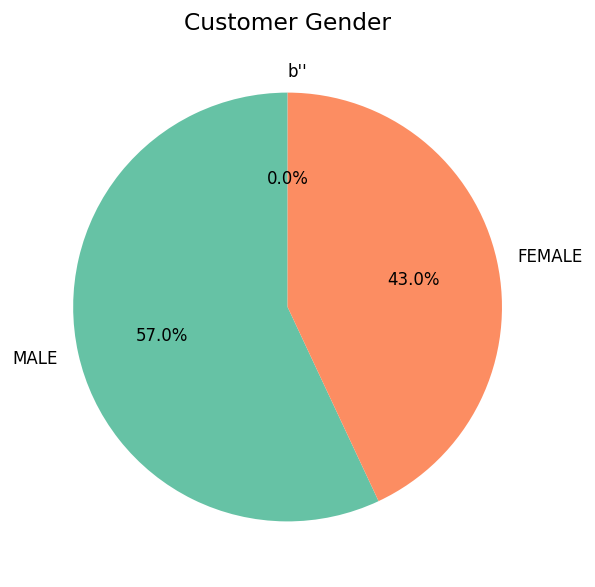

Bar chart of devices used to place orders (android, ios, web).
        Indicates the platform mix. Could correlate with customer demographics
        or behavior patterns (e.g. web users might be more deliberate).

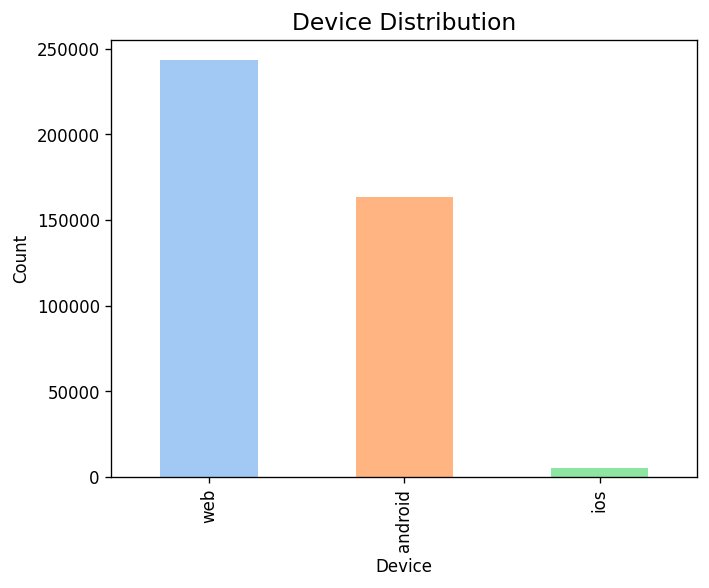

Grid of histograms for 10 key numeric features (clipped to 1st-99th percentile to remove outliers):
        - **Selected_Price**: order price — likely right-skewed
        - **Duration**: service duration in hours
        - **Customer_CharehPoints**: loyalty points
        - **Customer_PreviousOrdersCount**: repeat usage
        - **arranged_expert_rate**: expert rating
        - **arranged_expert_successful_jobs**: expert experience
        - **Time_to_First_Contract**: minutes until first expert responds
        - **Time_to_Service**: minutes from order creation to service start
        - **Customer_Account_Age**: how old the customer account is
        - **Customer_Order_Rate**: order frequency

        Look for: skewness (may need log transform), bimodal patterns, zero-inflation.

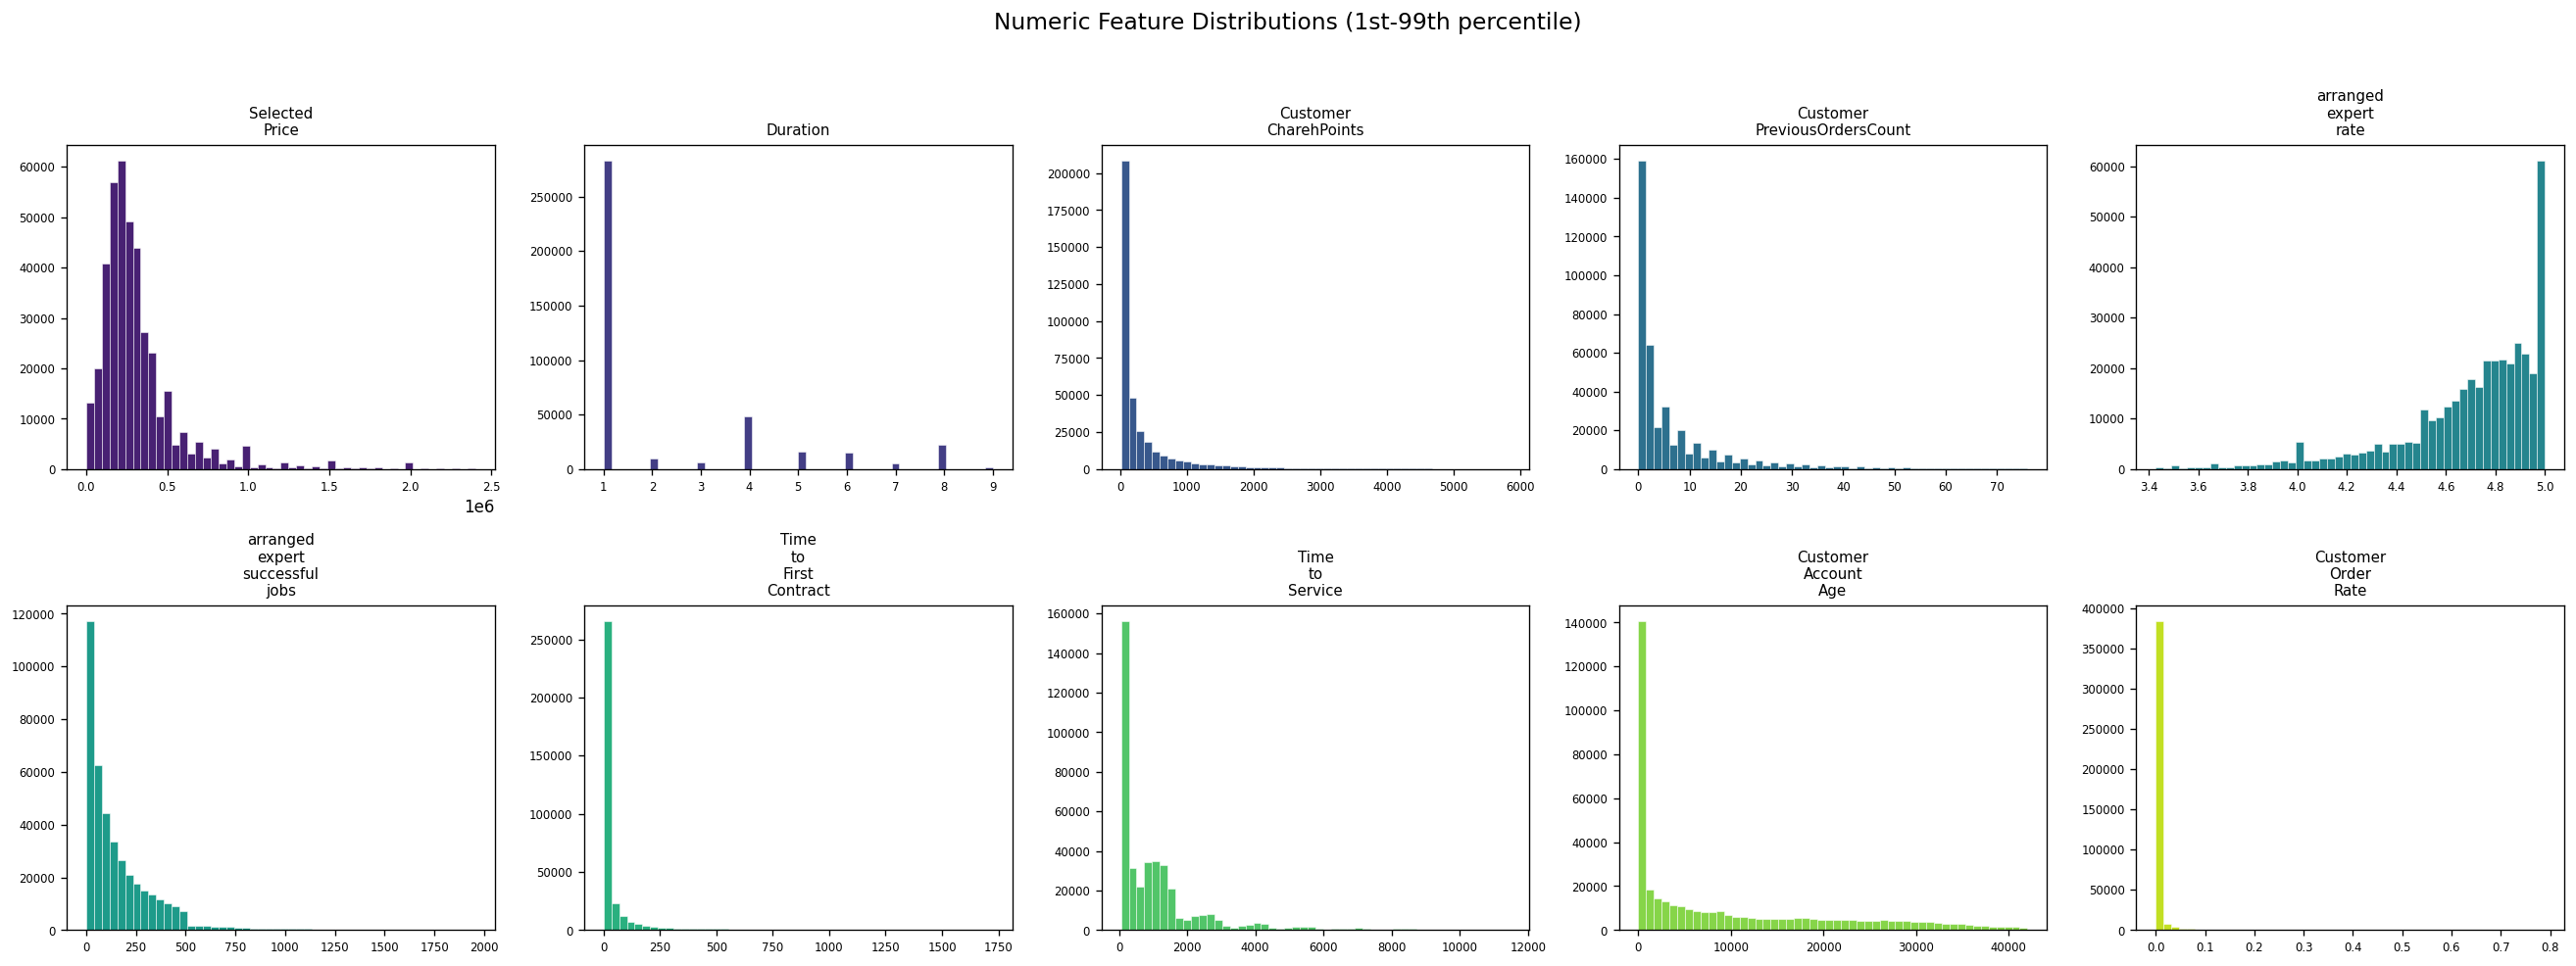

Lower-triangle heatmap of Pearson correlations between ALL numeric features.
        Color scale: red = positive, blue = negative correlation.
        Use this to spot:
        - **Multicollinearity** (highly correlated feature pairs — redundant for models)
        - **Target-correlated features** (if State is encoded)
        - **Feature clusters** that move together

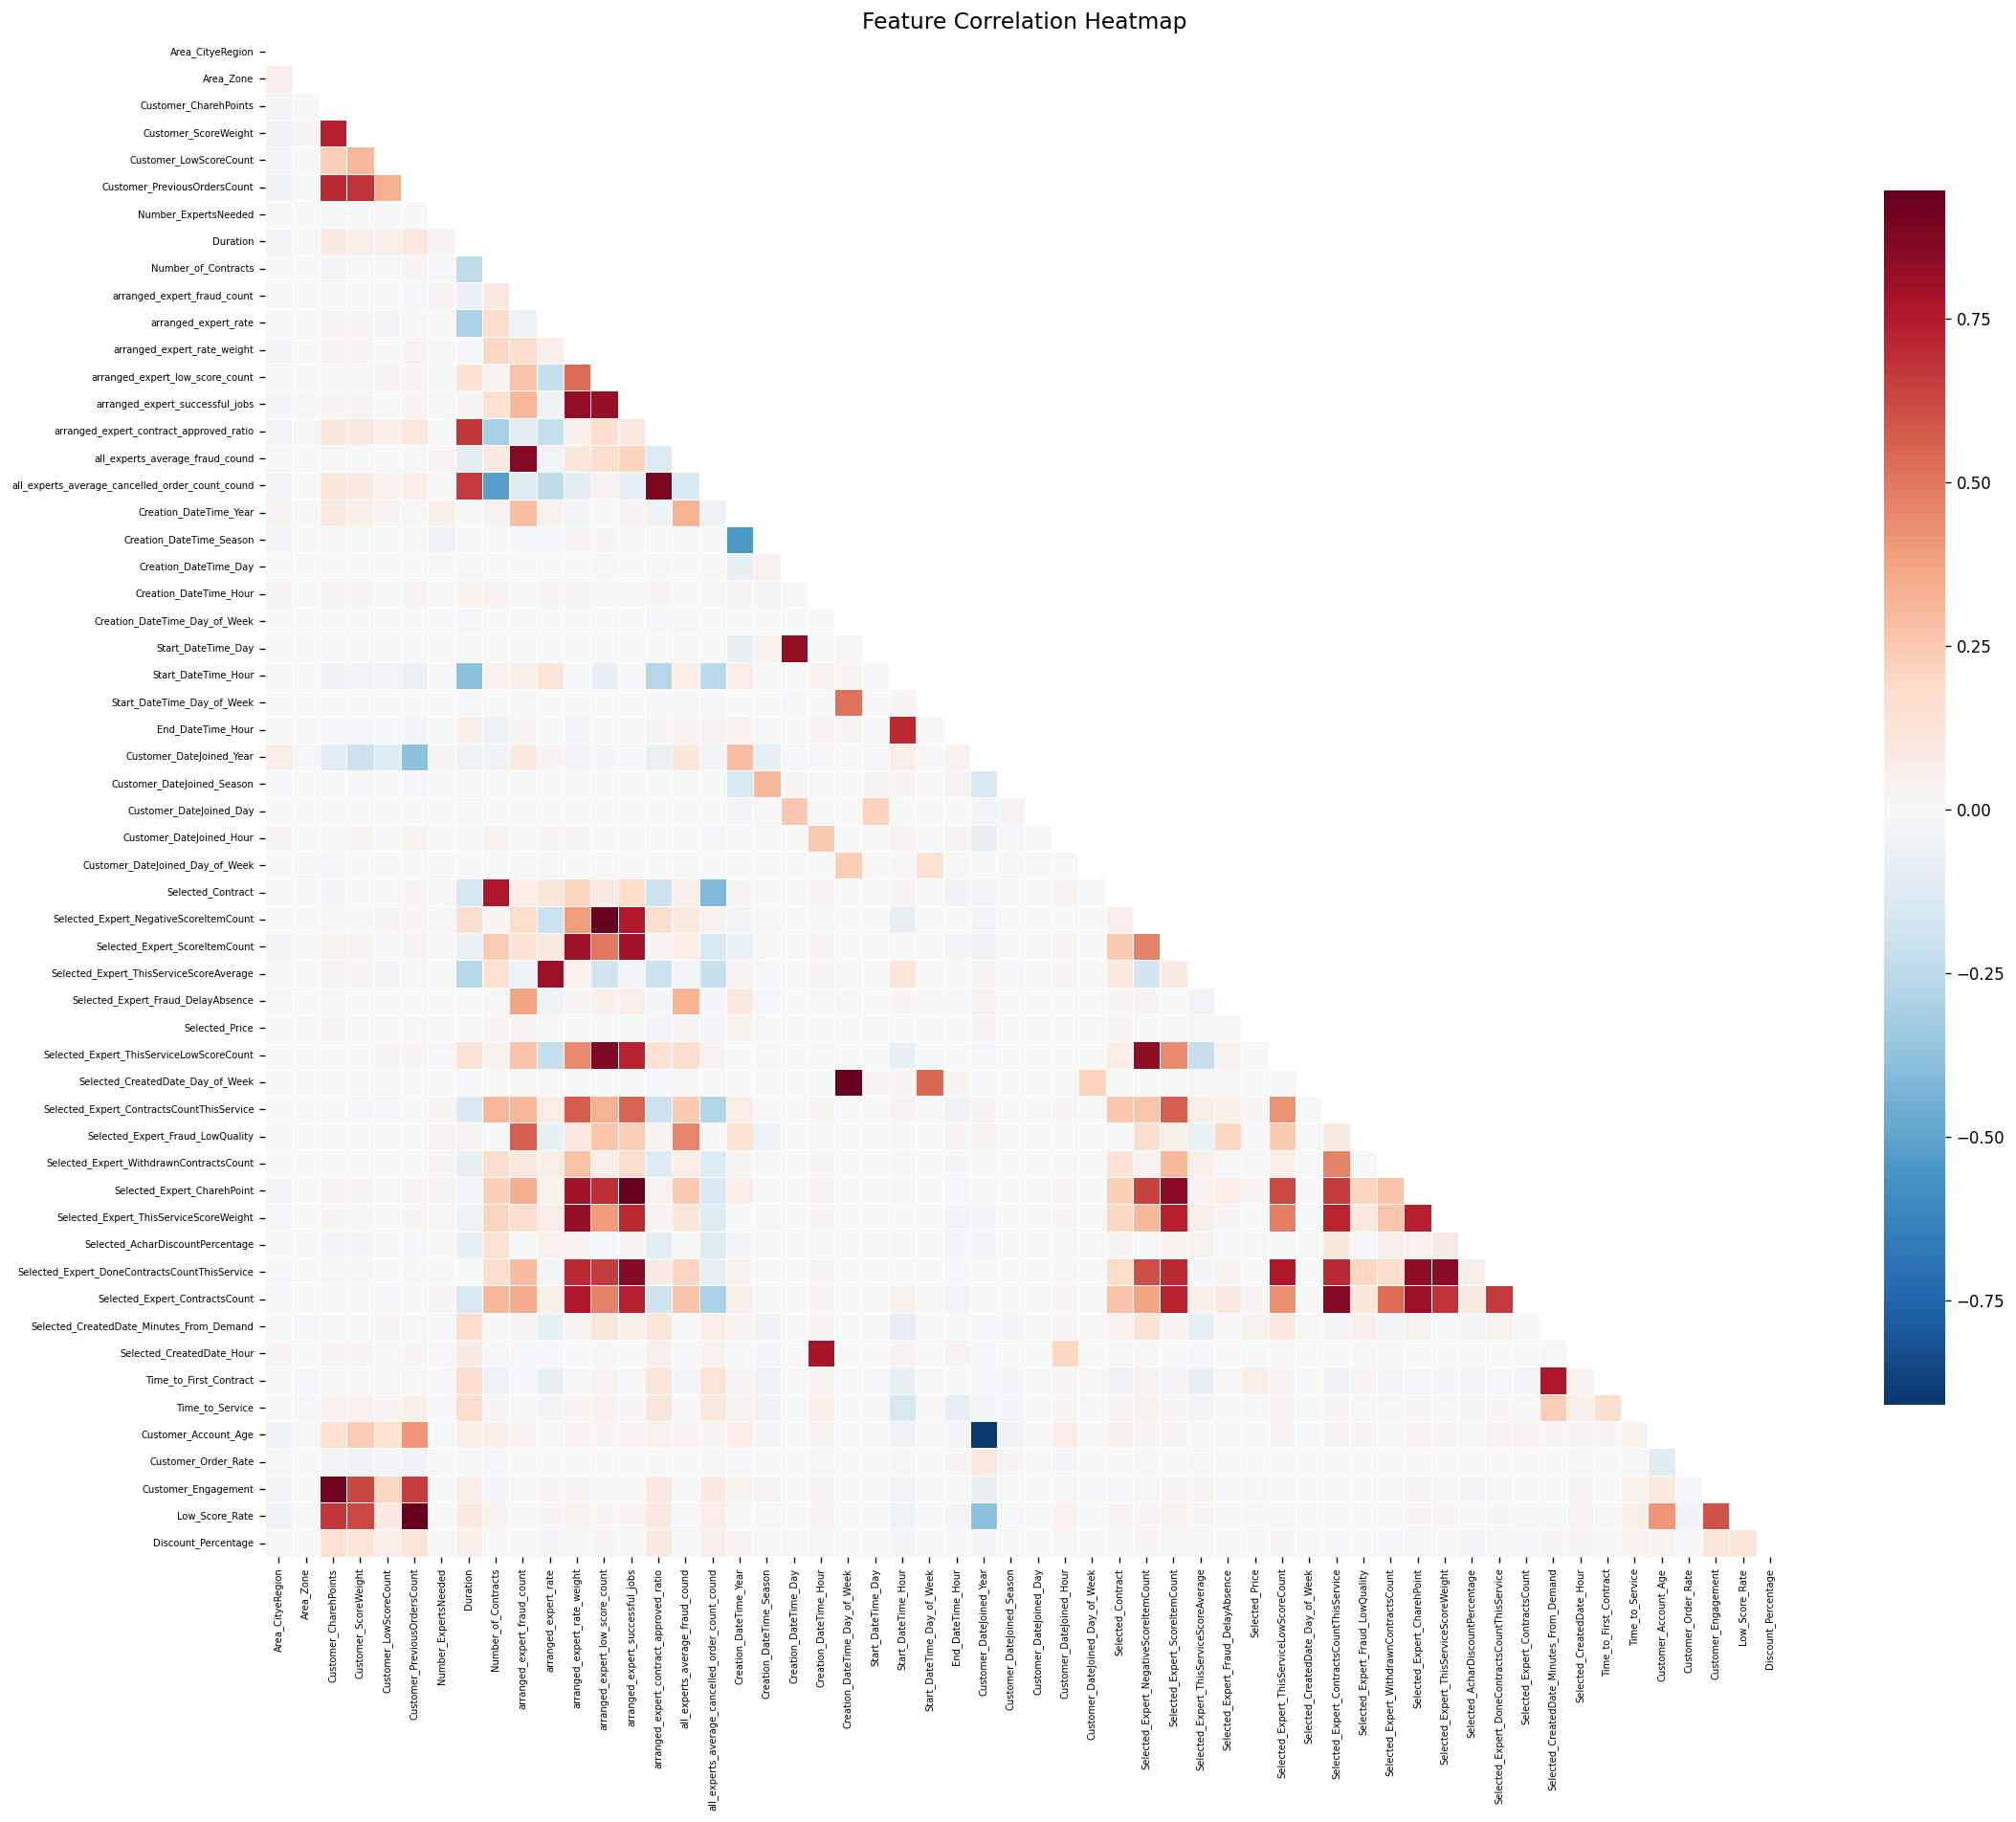

Zoomed-in view: the 30 strongest absolute correlations between feature pairs.
        Green = positive, Red = negative.
        Highly correlated pairs (|r| > 0.8) are candidates for dropping one of the two.
        E.g. expert contracts count vs done contracts count are likely near-duplicates.

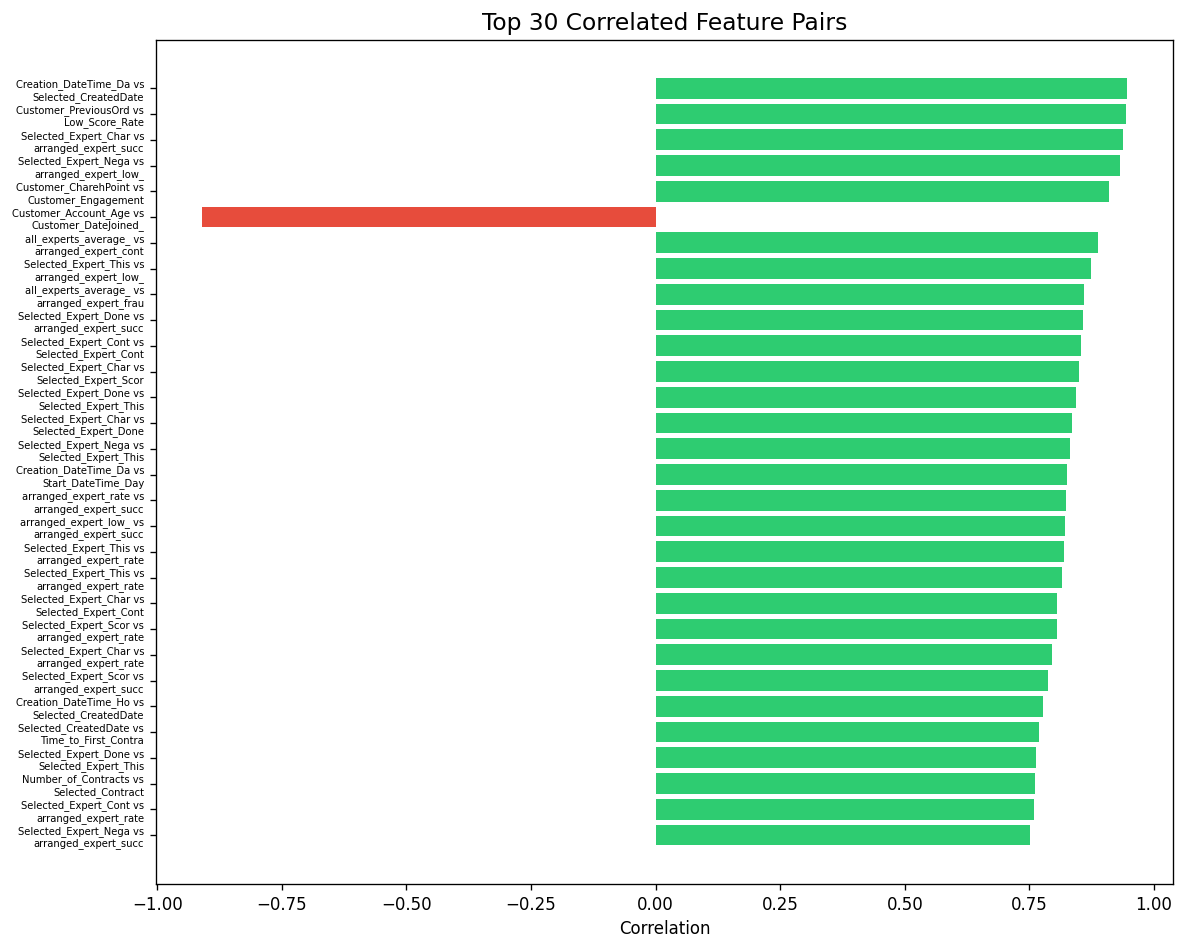

Two plots side by side:
        - **Left**: order volume by year (2021-2023) — shows business growth/decline
        - **Right**: order volume by season — reveals seasonality

        Seasonality matters for time-based splits and for understanding demand cycles.

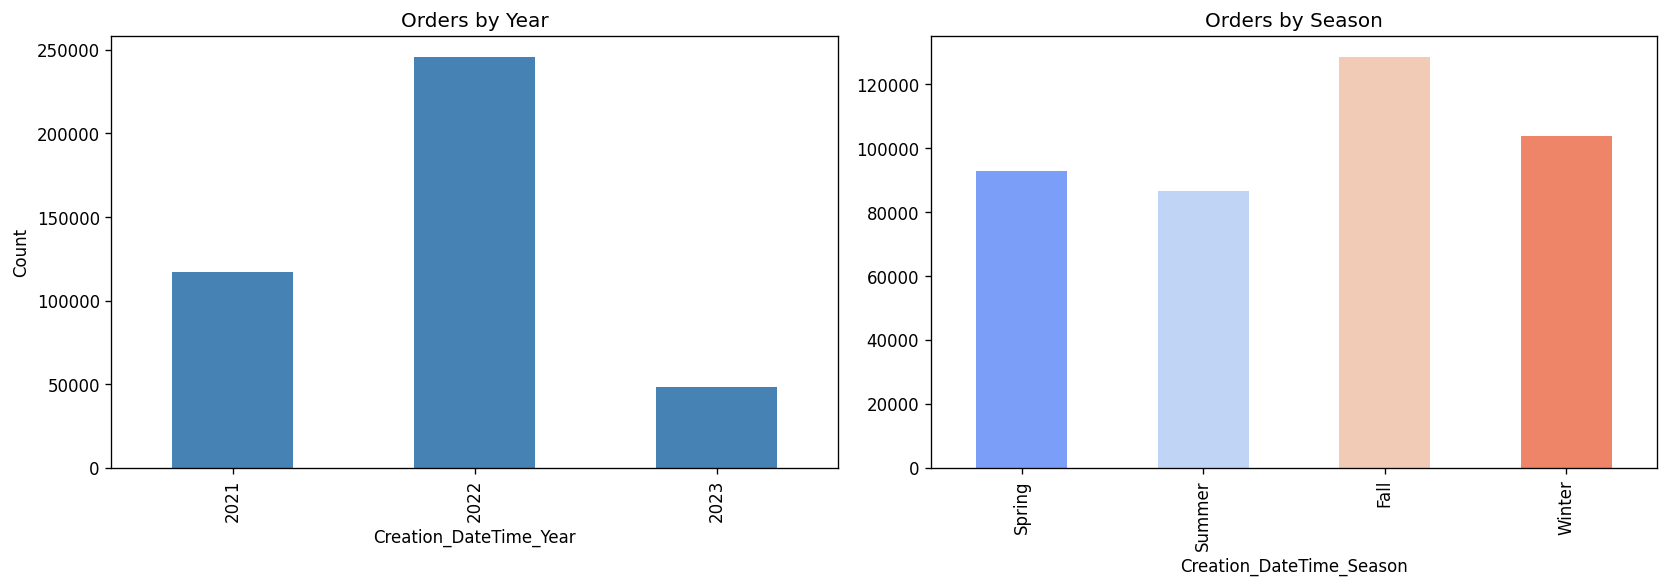

Line chart of order creation count by hour of day (0-23).
        Shows when customers place orders — expect peaks in morning/evening.
        Useful for understanding customer behavior and could be a predictive feature.

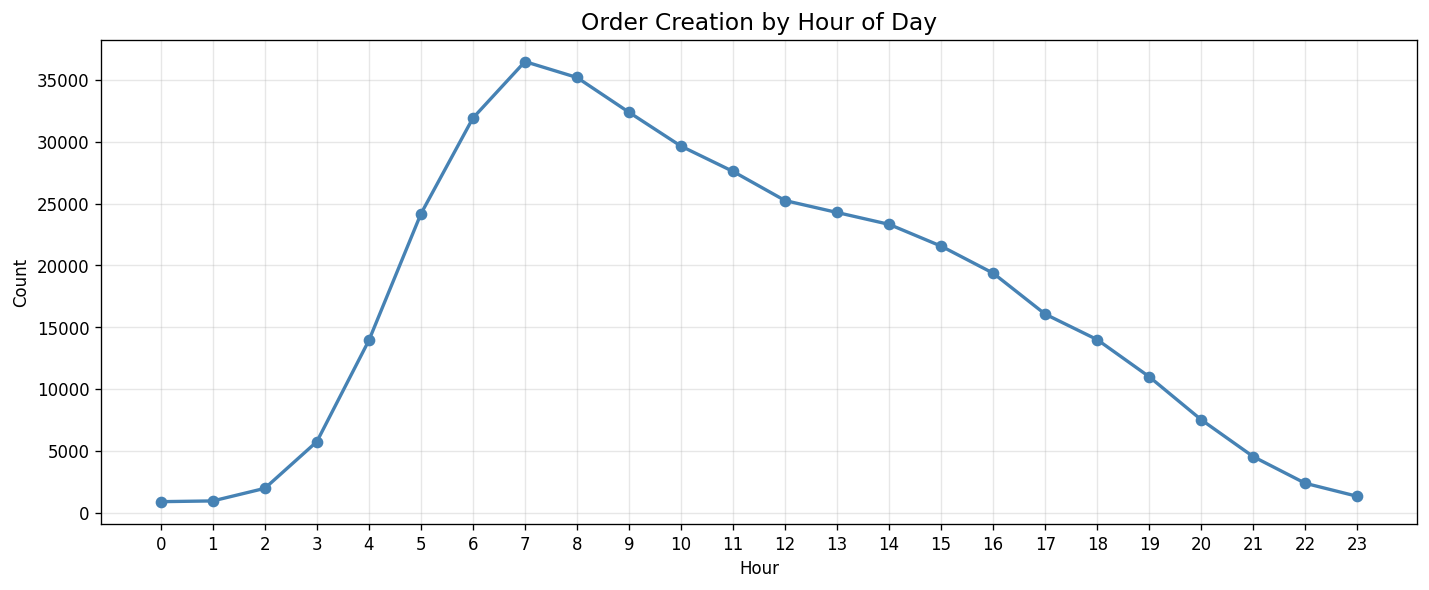

Bar chart of orders by weekday (Mon-Sun).
        Shows weekly demand cycles. If weekends differ significantly from weekdays,
        this feature carries signal. Note: in Iran, the weekend is Thu-Fri.

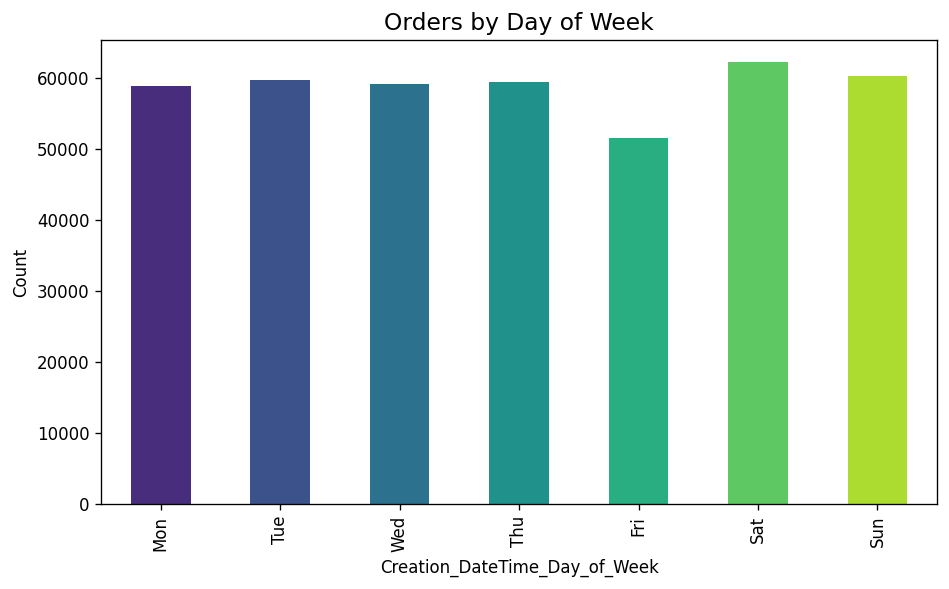

Two bar charts:
        - **Allocation Type**: AUTOMATIC vs MANUAL allocation of experts — 
          shows how orders are matched to service providers
        - **Counselling Needed**: whether the order required pre-service consultation (True/False)

        These are process-related features that may strongly predict outcomes.

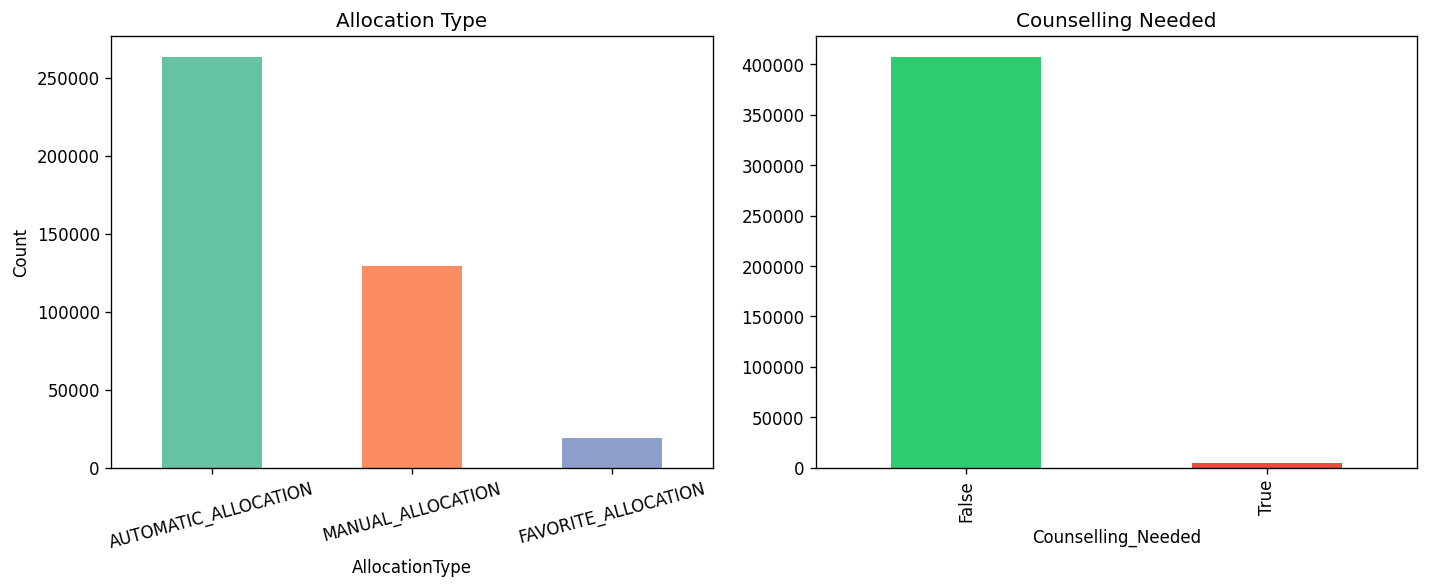

Boxplots of Selected_Price grouped by order State (clipped to 5th-95th percentile).
        Shows whether price differs across outcomes (CLOSED, CANCELLED, etc.).
        If cancelled orders have systematically different prices, price is predictive.
        Look for differences in medians and spread across states.

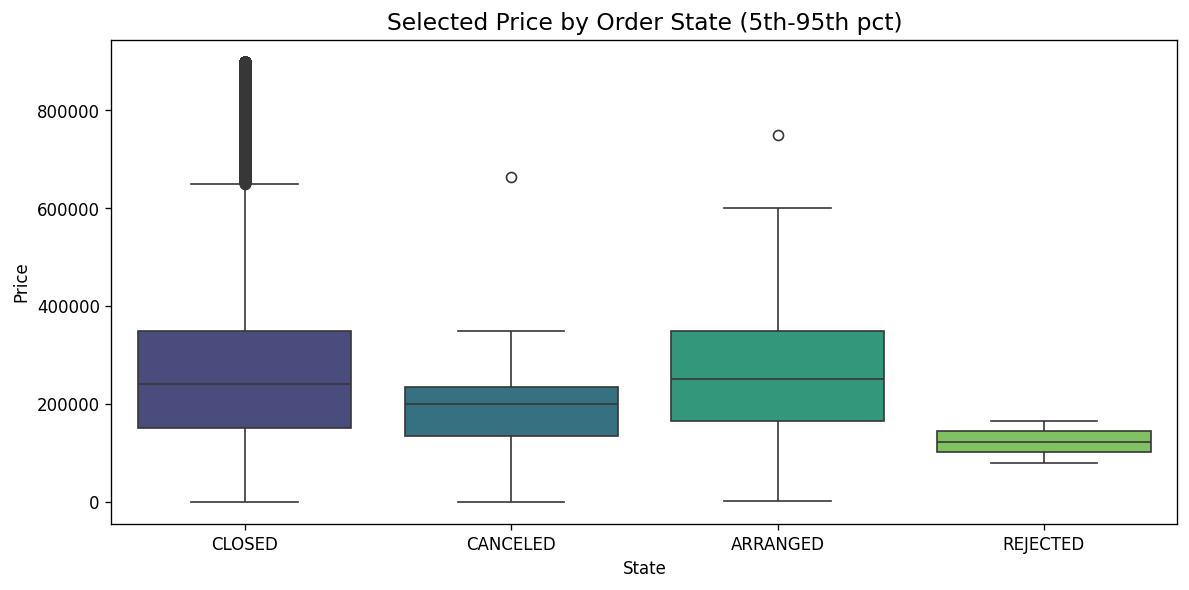

Horizontal bar chart showing columns with missing data and their percentage.
        Key for data cleaning decisions:
        - High missing (>20%): consider dropping or creating a 'missing' indicator
        - Low missing (<5%): impute with median/mode
        - Pattern matters: if missingness correlates with the target, it's informative (MNAR)

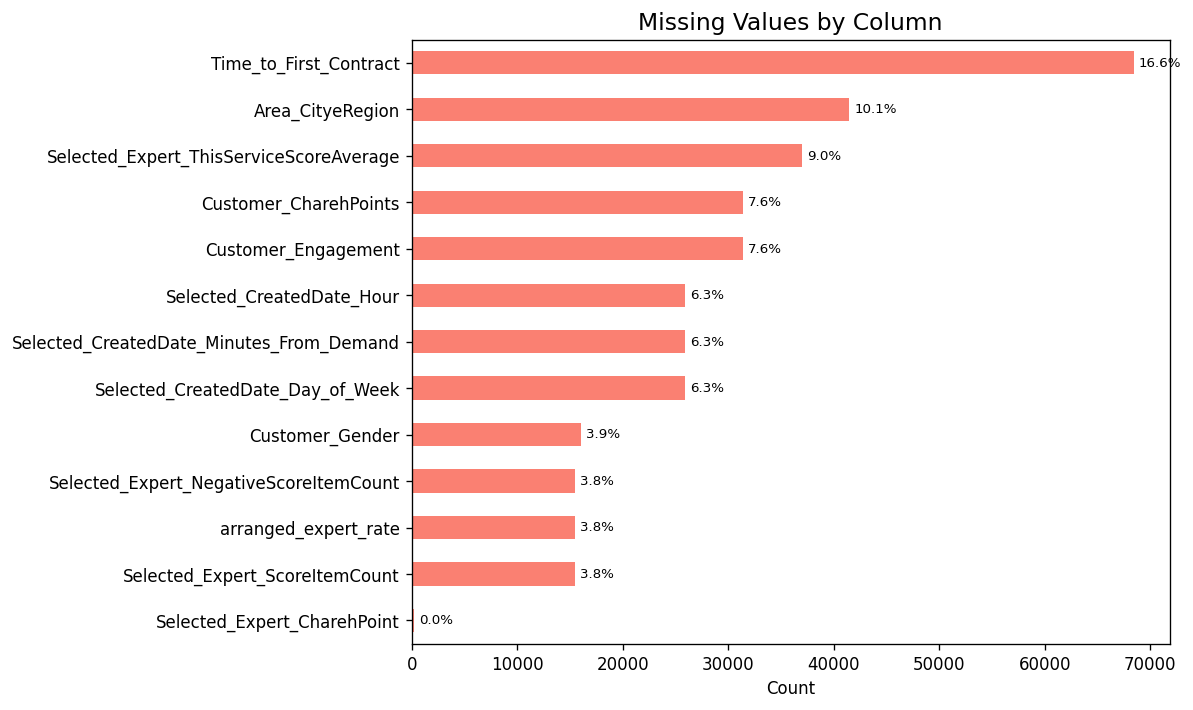

In [7]:
# ============================================================
# Load and render all plots
# ============================================================
plot_files = sorted(glob.glob("plot_*.json"))
print(f"Found {len(plot_files)} plot files\n")

for fpath in plot_files:
    with open(fpath, 'r') as f:
        data = json.load(f)

    key = list(data.keys())[0]
    b64 = data[key]

    info = descriptions.get(key, {"title": key, "desc": "No description available."})

    display(HTML(f"<hr><h2>📊 {info['title']}</h2>"))
    display(Markdown(info['desc']))
    display(Image(data=base64.b64decode(b64)))
    print()

display(HTML("<hr><h2>✅ All plots rendered!</h2>"))